In [13]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings

# Suppress warnings and set random seed
warnings.filterwarnings('ignore')
np.random.seed(42)

In [15]:
# Load datasets
train_df = pd.read_csv('mnist_train.csv')  # 60,000 rows × 785 columns
test_df = pd.read_csv('mnist_test.csv')    # 10,000 rows × 785 columns

In [17]:
# Separate features and labels
X_train = train_df.drop('label', axis=1)  # 60,000 × 784
y_train = train_df['label']
X_test = test_df.drop('label', axis=1)    # 10,000 × 784
y_test = test_df['label']

In [19]:
# Define and train models, then evaluate
models = {
    'Logistic Regression': LogisticRegression(max_iter=100),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB()
}

for name, model in models.items():
    model.fit(X_train, y_train)           # Train on training data
    y_pred = model.predict(X_test)        # Predict on test data
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    print(f'\n{name} Accuracy: {accuracy:.3f}')
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


Logistic Regression Accuracy: 0.925
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.97      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.90      0.91      0.91      1010
           4       0.93      0.93      0.93       982
           5       0.90      0.87      0.89       892
           6       0.94      0.95      0.95       958
           7       0.93      0.93      0.93      1028
           8       0.87      0.89      0.88       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000

Confusion Matrix:
[[ 963    0    0    3    1    3    4    4    2    0]
 [   0 1112    4    2    0    1    3    2   11    0]
 [   3   10  926   15    6    4   15    8   42    3]
 [  

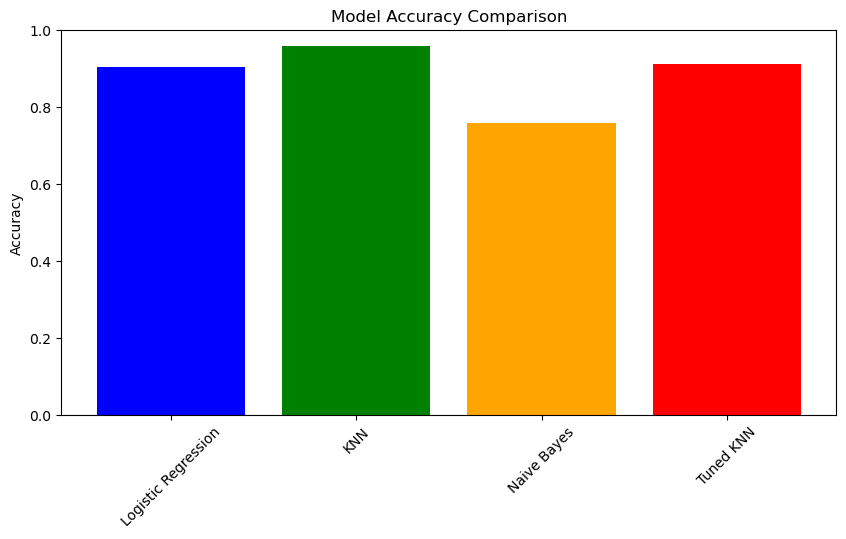

In [29]:
plt.figure(figsize=(10, 5))
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'orange', 'red'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)

# Save the plot as an image
plt.savefig('model_accuracy_comparison.png', dpi=300, bbox_inches='tight')

plt.show()

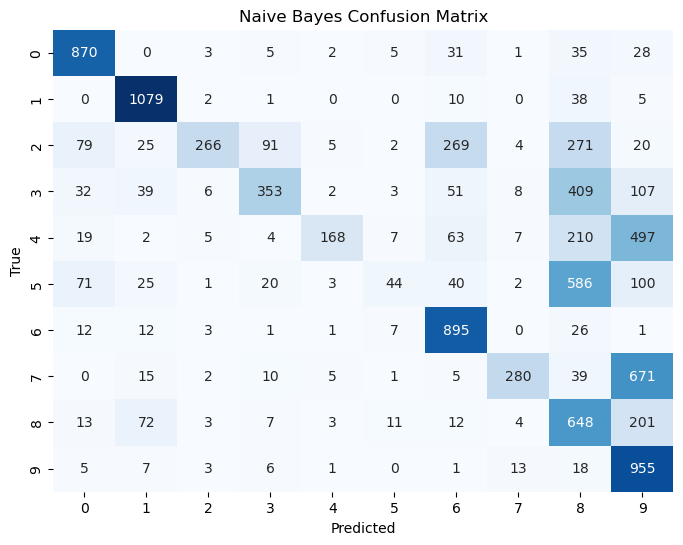

In [27]:
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# Example confusion matrix for Naive Bayes from your notebook
y_test = test_df['label']  # From Cell 3
y_pred_nb = models['Naive Bayes'].predict(X_test)  # From Cell 4
cm = confusion_matrix(y_test, y_pred_nb)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('naive_bayes_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()